## Fitting functions with Random ReLu Features

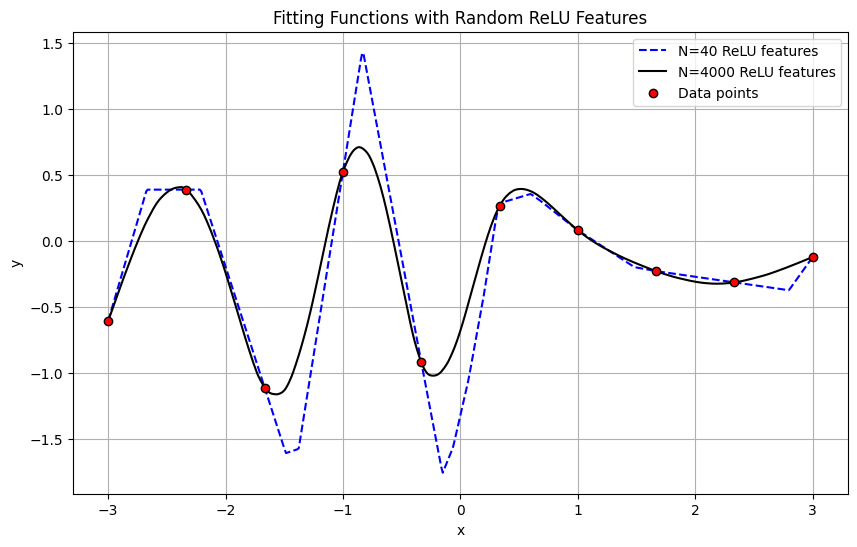

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(x, 0)

def generate_relu_features(x, N):
    np.random.seed(42)
    v1 = np.random.randn(N)
    v2 = np.random.randn(N)
    features = np.array([relu(v1[i] * x + v2[i]) for i in range(N)]).T
    return features

x_data = np.linspace(-3, 3, 10)
y_data = 0.5 * np.random.randn(len(x_data))

def fit_function(x, y, N):
    features = generate_relu_features(x, N)
    coeffs = np.linalg.lstsq(features, y, rcond=None)[0]
    return coeffs, features @ coeffs

x_hres = np.linspace(-3, 3, 500)

coeffs_40, y_fit_40 = fit_function(x_data, y_data, 40)
features_hres_40 = generate_relu_features(x_hres, 40)
y_hres_40 = features_hres_40 @ coeffs_40

coeffs_4000, y_fit_4000 = fit_function(x_data, y_data, 4000)
features_hres_4000 = generate_relu_features(x_hres, 4000)
y_hres_4000 = features_hres_4000 @ coeffs_4000

plt.figure(figsize=(10, 6))
plt.plot(x_hres, y_hres_40, 'b--', label='N=40 ReLU features')
plt.plot(x_hres, y_hres_4000, 'k-', label='N=4000 ReLU features')
plt.scatter(x_data, y_data, color='red', zorder=5, label='Data points', edgecolor='black')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Fitting Functions with Random ReLU Features')
plt.grid(True)
plt.show()
